In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import ast

In [3]:
!ls

gdrive	sample_data


In [4]:
!cd gdrive/MyDrive/MovieLens/

In [5]:
df = pd.read_csv('gdrive/MyDrive/MovieLens/movies_metadata.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.9469,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.0155,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.85949,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.38752,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [7]:
df.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [9]:
df.shape

(45466, 24)

In [10]:
dff = df[['id','genres','original_language','original_title','overview','title']].copy()
dff.head()

,id,genres,original_language,original_title,overview,title
0,862,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",Toy Story
1,8844,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",en,Jumanji,When siblings Judy and Peter discover an encha...,Jumanji
2,15602,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",en,Grumpier Old Men,A family wedding reignites the ancient feud be...,Grumpier Old Men
3,31357,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",Waiting to Exhale
4,11862,"[{'id': 35, 'name': 'Comedy'}]",en,Father of the Bride Part II,Just when George Banks has recovered from his ...,Father of the Bride Part II


In [11]:
dff['genres'] = dff['genres'].fillna('[]').apply(ast.literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
dff.head()

,id,genres,original_language,original_title,overview,title
0,862,"[Animation, Comedy, Family]",en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",Toy Story
1,8844,"[Adventure, Fantasy, Family]",en,Jumanji,When siblings Judy and Peter discover an encha...,Jumanji
2,15602,"[Romance, Comedy]",en,Grumpier Old Men,A family wedding reignites the ancient feud be...,Grumpier Old Men
3,31357,"[Comedy, Drama, Romance]",en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",Waiting to Exhale
4,11862,[Comedy],en,Father of the Bride Part II,Just when George Banks has recovered from his ...,Father of the Bride Part II


In [13]:
dff.to_csv('gdrive/MyDrive/MovieLens/moviesList-preprocessed.csv')

In [ ]:
genreList = []
for i in range(len(dff)):
  for j in range(len(dff['genres'][i])):
    #if dff['genres'][i][j] not in genreList:      
    genreList.append(dff['genres'][i][j])


In [ ]:
vcs = pd.DataFrame(genreList)[0].value_counts()

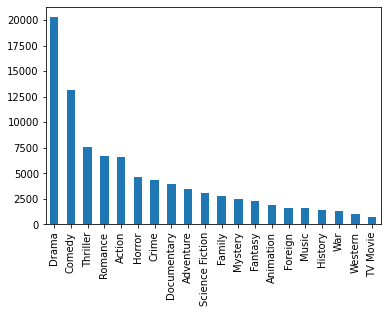

In [ ]:
vcs[:20].plot(kind='bar')

In [ ]:
os.getcwd()

'/content'

In [ ]:
import time
start_time = time.time()
!pip install fuzzywuzzy
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
def checker(wrong_options,correct_options):
  names_array=[]
  ratio_array=[]    
  for wrong_option in wrong_options:
      if wrong_option in correct_options:
          names_array.append(wrong_option)
          ratio_array.append('100')
      else:   
          x=process.extract(wrong_option,correct_options,scorer=fuzz.token_set_ratio)
          names_array.append(x[0])
          ratio_array.append(x[1])
  return names_array,ratio_array
str2Match = ['Othello']
strOptions = dff.title.tolist()
#matches = process.extract(str2Match[0],strOptions,scorer=fuzz.token_set_ratio)
#print(matches)
a,b = checker(str2Match,strOptions)
dff1 = dff[dff['title']==a[0]]
print(dff1)
str2Match1 = ['The evil Iago pretends to be friend of Othello in order to manupulate him to serve his own end in the film version of this shakespeare classic.']
strOptions1 = dff1.overview.tolist()
a1,b1 = checker(str2Match1,strOptions1)

titleO, descriptionO, genreO = dff1[dff1['overview']==a1[0][0]]['title'], dff1[dff1['overview']==a1[0][0]]['overview'], dff1[dff1['overview']==a1[0][0]]['genres']

print('title: ',titleO.values)
print('description: ',descriptionO.values)
print('genre: ',genreO.values)
print("--- %s seconds ---" % (time.time() - start_time))

           id  ...    title
25      16420  ...  Othello
2733    47697  ...  Othello
15347   44006  ...  Othello
21274  119928  ...  Othello

[4 rows x 6 columns]
title:  ['Othello']
description:  ['The evil Iago pretends to be friend of Othello in order to manipulate him to serve his own end in the film version of this Shakespeare classic.']
genre:  [list(['Drama'])]
--- 2.7627439498901367 seconds ---


'Othello'

In [ ]:
a,b = checker(str2Match,strOptions)
dff1 = dff[dff['title']==a[0]]
print(dff1)
str2Match1 = ['The evil Iago pretends to be friend of Othello in order to manupulate him to serve his own end in the film version of this shakespeare classic.']
strOptions1 = dff1.overview.tolist()
a1,b1 = checker(str2Match1,strOptions1)

titleO, descriptionO, genreO = dff1[dff1['overview']==a1[0][0]]['title'], dff1[dff1['overview']==a1[0][0]]['overview'], dff1[dff1['overview']==a1[0][0]]['genres']

print('title: ',titleO.values)
print('description: ',descriptionO.values)
print('genre: ',genreO.values)
print("--- %s seconds ---" % (time.time() - start_time))

           id  ...    title
25      16420  ...  Othello
2733    47697  ...  Othello
15347   44006  ...  Othello
21274  119928  ...  Othello

[4 rows x 6 columns]
title:  ['Othello']
description:  ['The evil Iago pretends to be friend of Othello in order to manipulate him to serve his own end in the film version of this Shakespeare classic.']
genre:  [list(['Drama'])]
--- 49.91946816444397 seconds ---


In [ ]:
dff[dff['title']=="Othello"]

,id,genres,original_language,original_title,overview,title
25,16420,[Drama],en,Othello,The evil Iago pretends to be friend of Othello...,Othello
2733,47697,"[Drama, Romance]",en,Othello,"Desdemona, daughter of a Venetian aristocrat, ...",Othello
15347,44006,[Drama],en,Othello,The 1965 version of the Shakespeare play.,Othello
21274,119928,[],en,Othello,Iago and a comrade-in-arms are outside the Ven...,Othello


In [ ]:
import time
start_time = time.time()
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
def checker(wrong_options,correct_options):
  names_array=[]
  ratio_array=[]    
  for wrong_option in wrong_options:
      if wrong_option in correct_options:
          names_array.append(wrong_option)
          ratio_array.append('100')
      else:   
          x=process.extractOne(wrong_option,correct_options,scorer=fuzz.token_set_ratio)
          names_array.append(x[0])
          ratio_array.append(x[1])
  return names_array,ratio_array
str2Match = ['The evil Iago pretends to be friend of Othello in order to manupulate him to serve his own end in the film version of this shakespeare classic']
strOptions = dff.overview.tolist()
a,b = checker(str2Match,strOptions)
titleO, descriptionO, genreO = dff[dff['overview']==a[0]]['title'], dff[dff['overview']==a[0]]['overview'], dff[dff['overview']==a[0]]['genres']
print('title: ',titleO.values)
print('description: ',descriptionO.values)
print('genre: ',genreO.values)
print("--- %s seconds ---" % (time.time() - start_time))

title:  ['Othello']
description:  ['The evil Iago pretends to be friend of Othello in order to manipulate him to serve his own end in the film version of this Shakespeare classic.']
genre:  [list(['Drama'])]
--- 43.55793881416321 seconds ---


In [ ]:
dff[dff['title'] == 'Forrest Gump']

,id,genres,original_language,original_title,overview,title
351,13,"[Comedy, Drama, Romance]",en,Forrest Gump,A man with a low IQ has accomplished great thi...,Forrest Gump


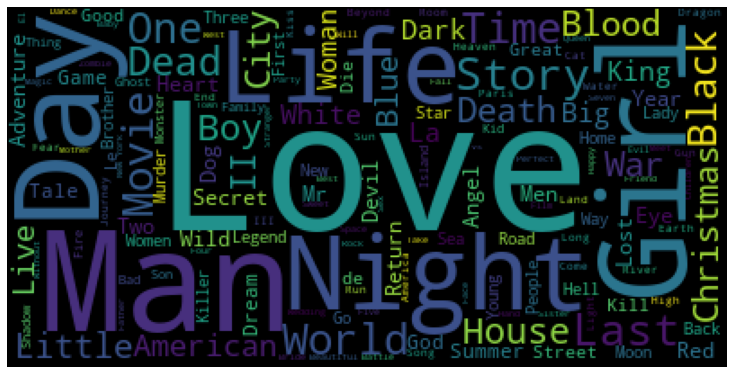

In [ ]:
from wordcloud import WordCloud
wordcloud = WordCloud().generate(' '.join(dff['title'].astype(str)))
# plot the WordCloud image
plt.figure(figsize = (10, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()